# SMS Spam Collection v.1


1. DESCRIPTION
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf
- A subset of 3,375 SMS ham messages of the NUS SMS Corpus (NSC), which is a corpus of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/
- The amount of 1,002 SMS ham messages and 322 spam messages extracted from the SMS Spam Corpus v.0.1 Big created by José María Gómez Hidalgo and public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/


1.2. Statistics
---------------

There is one collection:

- The SMS Spam Collection v.1 (text file: smsspamcollection) has a total of 4,827 SMS legitimate messages (86.6%) and a total of 747 (13.4%) spam messages.


1.3. Format
-----------

The files contain one message per line. Each line is composed by two columns: one with label (ham or spam) and other with the raw text. Here are some examples:

ham   What you doing?how are you?
ham   Ok lar... Joking wif u oni...
ham   dun say so early hor... U c already then say...
ham   MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham   Siva is in hostel aha:-.
ham   Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam   FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam   Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam   URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: messages are not chronologically sorted.


2. USAGE
--------

We offer a comprehensive study of this corpus in the following paper that is under review. This work presents a number of statistics, studies and baseline results for several machine learning methods.

[1] Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (ACM DOCENG'11), Mountain View, CA, USA, 2011. (Under review)


3. ABOUT
--------

The corpus has been collected by Tiago Agostinho de Almeida (http://www.dt.fee.unicamp.br/~tiago) and José María Gómez Hidalgo (http://www.esp.uem.es/jmgomez).

We would like to thank Dr. Min-Yen Kan (http://www.comp.nus.edu.sg/~kanmy/) and his team for making the NUS SMS Corpus available. See: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/. He is currently collecting a bigger SMS corpus at: http://wing.comp.nus.edu.sg:8080/SMSCorpus/

4. REF
---------------------

http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import cntk as C
import __future__
import urllib
import zipfile
import csv
import re

In [4]:
##############read the downloaded csv file

exampleFile = open('./data/sms spam/SMSSpamCollection')
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)

In [5]:
##############transform the file

for ii in range(0,len(exampleData)):
    if ii==0:
        y_raw_data=[re.sub(r'[^\w]', ' ',str(exampleData[ii]).split('\\t')[0])]
        x_raw_data=[re.sub(r'[^\w]', ' ',str(exampleData[ii]).split('\\t')[1])]
    else:
        y_raw_data= y_raw_data+[re.sub(r'[^\w]', ' ',str(exampleData[ii]).split('\\t')[0])]
        x_raw_data=x_raw_data+[re.sub(r'[^\w]', ' ',str(exampleData[ii]).split('\\t')[1])]

In [6]:
##############convert the format
#text=str(x_raw_data)##############convert the data into string format
def clean_and_split_data(text):
    text=text.lower()#################convert all character into lower case
    import re
    text_clean=re.sub(r'[^\w]', ' ', text)####remove all symbol
    text_clean=re.sub(r'[_]', ' ', text_clean)####remove special symbol
    text_clean=re.sub(r'[0-9]', '', text_clean)####remove all numbers
    words=text_clean.split()#####################split the sentence into words
    return(words)



for i in range(0,len(x_raw_data)):
    if i==0:
        words=clean_and_split_data(x_raw_data[i])
    else:
        words=words+clean_and_split_data(x_raw_data[i])


In [7]:
###############################################Create a word vector list

word_text=np.unique(words)#####################find out the unique words
word_vec=np.eye(len(np.unique(words)))#########create a unique vector for each unique word
label_text=np.unique(y_raw_data)###############find out the unique label
label_vec=np.eye(len(np.unique(y_raw_data)))###create a unique vector for each unique label

In [9]:
###############################################Convert input data and label into vectors

print("This may take some time for converting all sentences into vectors")
for i in range(0,len(x_raw_data)):
    print(i)
    print("convert sentence into vector out of")
    print(len(x_raw_data))
    temp_words=clean_and_split_data(x_raw_data[i])
    for ii in range(0,len(temp_words)):
        addr_word=word_text==temp_words[ii]#### find the address of words from the word vector list
        word_vec_temp=word_vec[addr_word]### extract the word vector
        if ii==0:
            sentence_vec=word_vec_temp
        else:
            sentence_vec=sentence_vec+word_vec_temp
    addr_label=label_text==y_raw_data[i]
    label_vec_temp=label_vec[addr_label]
    if i==0:
        x_text=[temp_words]
        x_vec=[sentence_vec[0]]
        y_text=[y_raw_data[i]]
        y_vec=[label_vec_temp[0]]
    else:
        x_text=x_text+[temp_words]
        x_vec=x_vec+[sentence_vec[0]]
        y_text=y_text+[y_raw_data[i]]
        y_vec=y_vec+[label_vec_temp[0]]
        
print('Now the input data is ready')

This may take some time for converting all sentences into vectors
0
convert sentence into vector out of
5574
1
convert sentence into vector out of
5574
2
convert sentence into vector out of
5574
3
convert sentence into vector out of
5574
4
convert sentence into vector out of
5574
5
convert sentence into vector out of
5574
6
convert sentence into vector out of
5574
7
convert sentence into vector out of
5574
8
convert sentence into vector out of
5574
9
convert sentence into vector out of
5574
10
convert sentence into vector out of
5574
11
convert sentence into vector out of
5574
12
convert sentence into vector out of
5574
13
convert sentence into vector out of
5574
14
convert sentence into vector out of
5574
15
convert sentence into vector out of
5574
16
convert sentence into vector out of
5574
17
convert sentence into vector out of
5574
18
convert sentence into vector out of
5574
19
convert sentence into vector out of
5574
20
convert sentence into vector out of
5574
21
convert sentence 

convert sentence into vector out of
5574
248
convert sentence into vector out of
5574
249
convert sentence into vector out of
5574
250
convert sentence into vector out of
5574
251
convert sentence into vector out of
5574
252
convert sentence into vector out of
5574
253
convert sentence into vector out of
5574
254
convert sentence into vector out of
5574
255
convert sentence into vector out of
5574
256
convert sentence into vector out of
5574
257
convert sentence into vector out of
5574
258
convert sentence into vector out of
5574
259
convert sentence into vector out of
5574
260
convert sentence into vector out of
5574
261
convert sentence into vector out of
5574
262
convert sentence into vector out of
5574
263
convert sentence into vector out of
5574
264
convert sentence into vector out of
5574
265
convert sentence into vector out of
5574
266
convert sentence into vector out of
5574
267
convert sentence into vector out of
5574
268
convert sentence into vector out of
5574
269
convert se

convert sentence into vector out of
5574
430
convert sentence into vector out of
5574
431
convert sentence into vector out of
5574
432
convert sentence into vector out of
5574
433
convert sentence into vector out of
5574
434
convert sentence into vector out of
5574
435
convert sentence into vector out of
5574
436
convert sentence into vector out of
5574
437
convert sentence into vector out of
5574
438
convert sentence into vector out of
5574
439
convert sentence into vector out of
5574
440
convert sentence into vector out of
5574
441
convert sentence into vector out of
5574
442
convert sentence into vector out of
5574
443
convert sentence into vector out of
5574
444
convert sentence into vector out of
5574
445
convert sentence into vector out of
5574
446
convert sentence into vector out of
5574
447
convert sentence into vector out of
5574
448
convert sentence into vector out of
5574
449
convert sentence into vector out of
5574
450
convert sentence into vector out of
5574
451
convert se

676
convert sentence into vector out of
5574
677
convert sentence into vector out of
5574
678
convert sentence into vector out of
5574
679
convert sentence into vector out of
5574
680
convert sentence into vector out of
5574
681
convert sentence into vector out of
5574
682
convert sentence into vector out of
5574
683
convert sentence into vector out of
5574
684
convert sentence into vector out of
5574
685
convert sentence into vector out of
5574
686
convert sentence into vector out of
5574
687
convert sentence into vector out of
5574
688
convert sentence into vector out of
5574
689
convert sentence into vector out of
5574
690
convert sentence into vector out of
5574
691
convert sentence into vector out of
5574
692
convert sentence into vector out of
5574
693
convert sentence into vector out of
5574
694
convert sentence into vector out of
5574
695
convert sentence into vector out of
5574
696
convert sentence into vector out of
5574
697
convert sentence into vector out of
5574
698
conver

878
convert sentence into vector out of
5574
879
convert sentence into vector out of
5574
880
convert sentence into vector out of
5574
881
convert sentence into vector out of
5574
882
convert sentence into vector out of
5574
883
convert sentence into vector out of
5574
884
convert sentence into vector out of
5574
885
convert sentence into vector out of
5574
886
convert sentence into vector out of
5574
887
convert sentence into vector out of
5574
888
convert sentence into vector out of
5574
889
convert sentence into vector out of
5574
890
convert sentence into vector out of
5574
891
convert sentence into vector out of
5574
892
convert sentence into vector out of
5574
893
convert sentence into vector out of
5574
894
convert sentence into vector out of
5574
895
convert sentence into vector out of
5574
896
convert sentence into vector out of
5574
897
convert sentence into vector out of
5574
898
convert sentence into vector out of
5574
899
convert sentence into vector out of
5574
900
conver

1095
convert sentence into vector out of
5574
1096
convert sentence into vector out of
5574
1097
convert sentence into vector out of
5574
1098
convert sentence into vector out of
5574
1099
convert sentence into vector out of
5574
1100
convert sentence into vector out of
5574
1101
convert sentence into vector out of
5574
1102
convert sentence into vector out of
5574
1103
convert sentence into vector out of
5574
1104
convert sentence into vector out of
5574
1105
convert sentence into vector out of
5574
1106
convert sentence into vector out of
5574
1107
convert sentence into vector out of
5574
1108
convert sentence into vector out of
5574
1109
convert sentence into vector out of
5574
1110
convert sentence into vector out of
5574
1111
convert sentence into vector out of
5574
1112
convert sentence into vector out of
5574
1113
convert sentence into vector out of
5574
1114
convert sentence into vector out of
5574
1115
convert sentence into vector out of
5574
1116
convert sentence into vector 

1319
convert sentence into vector out of
5574
1320
convert sentence into vector out of
5574
1321
convert sentence into vector out of
5574
1322
convert sentence into vector out of
5574
1323
convert sentence into vector out of
5574
1324
convert sentence into vector out of
5574
1325
convert sentence into vector out of
5574
1326
convert sentence into vector out of
5574
1327
convert sentence into vector out of
5574
1328
convert sentence into vector out of
5574
1329
convert sentence into vector out of
5574
1330
convert sentence into vector out of
5574
1331
convert sentence into vector out of
5574
1332
convert sentence into vector out of
5574
1333
convert sentence into vector out of
5574
1334
convert sentence into vector out of
5574
1335
convert sentence into vector out of
5574
1336
convert sentence into vector out of
5574
1337
convert sentence into vector out of
5574
1338
convert sentence into vector out of
5574
1339
convert sentence into vector out of
5574
1340
convert sentence into vector 

5574
1551
convert sentence into vector out of
5574
1552
convert sentence into vector out of
5574
1553
convert sentence into vector out of
5574
1554
convert sentence into vector out of
5574
1555
convert sentence into vector out of
5574
1556
convert sentence into vector out of
5574
1557
convert sentence into vector out of
5574
1558
convert sentence into vector out of
5574
1559
convert sentence into vector out of
5574
1560
convert sentence into vector out of
5574
1561
convert sentence into vector out of
5574
1562
convert sentence into vector out of
5574
1563
convert sentence into vector out of
5574
1564
convert sentence into vector out of
5574
1565
convert sentence into vector out of
5574
1566
convert sentence into vector out of
5574
1567
convert sentence into vector out of
5574
1568
convert sentence into vector out of
5574
1569
convert sentence into vector out of
5574
1570
convert sentence into vector out of
5574
1571
convert sentence into vector out of
5574
1572
convert sentence into ve

1781
convert sentence into vector out of
5574
1782
convert sentence into vector out of
5574
1783
convert sentence into vector out of
5574
1784
convert sentence into vector out of
5574
1785
convert sentence into vector out of
5574
1786
convert sentence into vector out of
5574
1787
convert sentence into vector out of
5574
1788
convert sentence into vector out of
5574
1789
convert sentence into vector out of
5574
1790
convert sentence into vector out of
5574
1791
convert sentence into vector out of
5574
1792
convert sentence into vector out of
5574
1793
convert sentence into vector out of
5574
1794
convert sentence into vector out of
5574
1795
convert sentence into vector out of
5574
1796
convert sentence into vector out of
5574
1797
convert sentence into vector out of
5574
1798
convert sentence into vector out of
5574
1799
convert sentence into vector out of
5574
1800
convert sentence into vector out of
5574
1801
convert sentence into vector out of
5574
1802
convert sentence into vector 

5574
1996
convert sentence into vector out of
5574
1997
convert sentence into vector out of
5574
1998
convert sentence into vector out of
5574
1999
convert sentence into vector out of
5574
2000
convert sentence into vector out of
5574
2001
convert sentence into vector out of
5574
2002
convert sentence into vector out of
5574
2003
convert sentence into vector out of
5574
2004
convert sentence into vector out of
5574
2005
convert sentence into vector out of
5574
2006
convert sentence into vector out of
5574
2007
convert sentence into vector out of
5574
2008
convert sentence into vector out of
5574
2009
convert sentence into vector out of
5574
2010
convert sentence into vector out of
5574
2011
convert sentence into vector out of
5574
2012
convert sentence into vector out of
5574
2013
convert sentence into vector out of
5574
2014
convert sentence into vector out of
5574
2015
convert sentence into vector out of
5574
2016
convert sentence into vector out of
5574
2017
convert sentence into ve

2195
convert sentence into vector out of
5574
2196
convert sentence into vector out of
5574
2197
convert sentence into vector out of
5574
2198
convert sentence into vector out of
5574
2199
convert sentence into vector out of
5574
2200
convert sentence into vector out of
5574
2201
convert sentence into vector out of
5574
2202
convert sentence into vector out of
5574
2203
convert sentence into vector out of
5574
2204
convert sentence into vector out of
5574
2205
convert sentence into vector out of
5574
2206
convert sentence into vector out of
5574
2207
convert sentence into vector out of
5574
2208
convert sentence into vector out of
5574
2209
convert sentence into vector out of
5574
2210
convert sentence into vector out of
5574
2211
convert sentence into vector out of
5574
2212
convert sentence into vector out of
5574
2213
convert sentence into vector out of
5574
2214
convert sentence into vector out of
5574
2215
convert sentence into vector out of
5574
2216
convert sentence into vector 

2413
convert sentence into vector out of
5574
2414
convert sentence into vector out of
5574
2415
convert sentence into vector out of
5574
2416
convert sentence into vector out of
5574
2417
convert sentence into vector out of
5574
2418
convert sentence into vector out of
5574
2419
convert sentence into vector out of
5574
2420
convert sentence into vector out of
5574
2421
convert sentence into vector out of
5574
2422
convert sentence into vector out of
5574
2423
convert sentence into vector out of
5574
2424
convert sentence into vector out of
5574
2425
convert sentence into vector out of
5574
2426
convert sentence into vector out of
5574
2427
convert sentence into vector out of
5574
2428
convert sentence into vector out of
5574
2429
convert sentence into vector out of
5574
2430
convert sentence into vector out of
5574
2431
convert sentence into vector out of
5574
2432
convert sentence into vector out of
5574
2433
convert sentence into vector out of
5574
2434
convert sentence into vector 

5574
2610
convert sentence into vector out of
5574
2611
convert sentence into vector out of
5574
2612
convert sentence into vector out of
5574
2613
convert sentence into vector out of
5574
2614
convert sentence into vector out of
5574
2615
convert sentence into vector out of
5574
2616
convert sentence into vector out of
5574
2617
convert sentence into vector out of
5574
2618
convert sentence into vector out of
5574
2619
convert sentence into vector out of
5574
2620
convert sentence into vector out of
5574
2621
convert sentence into vector out of
5574
2622
convert sentence into vector out of
5574
2623
convert sentence into vector out of
5574
2624
convert sentence into vector out of
5574
2625
convert sentence into vector out of
5574
2626
convert sentence into vector out of
5574
2627
convert sentence into vector out of
5574
2628
convert sentence into vector out of
5574
2629
convert sentence into vector out of
5574
2630
convert sentence into vector out of
5574
2631
convert sentence into ve

2837
convert sentence into vector out of
5574
2838
convert sentence into vector out of
5574
2839
convert sentence into vector out of
5574
2840
convert sentence into vector out of
5574
2841
convert sentence into vector out of
5574
2842
convert sentence into vector out of
5574
2843
convert sentence into vector out of
5574
2844
convert sentence into vector out of
5574
2845
convert sentence into vector out of
5574
2846
convert sentence into vector out of
5574
2847
convert sentence into vector out of
5574
2848
convert sentence into vector out of
5574
2849
convert sentence into vector out of
5574
2850
convert sentence into vector out of
5574
2851
convert sentence into vector out of
5574
2852
convert sentence into vector out of
5574
2853
convert sentence into vector out of
5574
2854
convert sentence into vector out of
5574
2855
convert sentence into vector out of
5574
2856
convert sentence into vector out of
5574
2857
convert sentence into vector out of
5574
2858
convert sentence into vector 

3083
convert sentence into vector out of
5574
3084
convert sentence into vector out of
5574
3085
convert sentence into vector out of
5574
3086
convert sentence into vector out of
5574
3087
convert sentence into vector out of
5574
3088
convert sentence into vector out of
5574
3089
convert sentence into vector out of
5574
3090
convert sentence into vector out of
5574
3091
convert sentence into vector out of
5574
3092
convert sentence into vector out of
5574
3093
convert sentence into vector out of
5574
3094
convert sentence into vector out of
5574
3095
convert sentence into vector out of
5574
3096
convert sentence into vector out of
5574
3097
convert sentence into vector out of
5574
3098
convert sentence into vector out of
5574
3099
convert sentence into vector out of
5574
3100
convert sentence into vector out of
5574
3101
convert sentence into vector out of
5574
3102
convert sentence into vector out of
5574
3103
convert sentence into vector out of
5574
3104
convert sentence into vector 

3313
convert sentence into vector out of
5574
3314
convert sentence into vector out of
5574
3315
convert sentence into vector out of
5574
3316
convert sentence into vector out of
5574
3317
convert sentence into vector out of
5574
3318
convert sentence into vector out of
5574
3319
convert sentence into vector out of
5574
3320
convert sentence into vector out of
5574
3321
convert sentence into vector out of
5574
3322
convert sentence into vector out of
5574
3323
convert sentence into vector out of
5574
3324
convert sentence into vector out of
5574
3325
convert sentence into vector out of
5574
3326
convert sentence into vector out of
5574
3327
convert sentence into vector out of
5574
3328
convert sentence into vector out of
5574
3329
convert sentence into vector out of
5574
3330
convert sentence into vector out of
5574
3331
convert sentence into vector out of
5574
3332
convert sentence into vector out of
5574
3333
convert sentence into vector out of
5574
3334
convert sentence into vector 

3524
convert sentence into vector out of
5574
3525
convert sentence into vector out of
5574
3526
convert sentence into vector out of
5574
3527
convert sentence into vector out of
5574
3528
convert sentence into vector out of
5574
3529
convert sentence into vector out of
5574
3530
convert sentence into vector out of
5574
3531
convert sentence into vector out of
5574
3532
convert sentence into vector out of
5574
3533
convert sentence into vector out of
5574
3534
convert sentence into vector out of
5574
3535
convert sentence into vector out of
5574
3536
convert sentence into vector out of
5574
3537
convert sentence into vector out of
5574
3538
convert sentence into vector out of
5574
3539
convert sentence into vector out of
5574
3540
convert sentence into vector out of
5574
3541
convert sentence into vector out of
5574
3542
convert sentence into vector out of
5574
3543
convert sentence into vector out of
5574
3544
convert sentence into vector out of
5574
3545
convert sentence into vector 

3766
convert sentence into vector out of
5574
3767
convert sentence into vector out of
5574
3768
convert sentence into vector out of
5574
3769
convert sentence into vector out of
5574
3770
convert sentence into vector out of
5574
3771
convert sentence into vector out of
5574
3772
convert sentence into vector out of
5574
3773
convert sentence into vector out of
5574
3774
convert sentence into vector out of
5574
3775
convert sentence into vector out of
5574
3776
convert sentence into vector out of
5574
3777
convert sentence into vector out of
5574
3778
convert sentence into vector out of
5574
3779
convert sentence into vector out of
5574
3780
convert sentence into vector out of
5574
3781
convert sentence into vector out of
5574
3782
convert sentence into vector out of
5574
3783
convert sentence into vector out of
5574
3784
convert sentence into vector out of
5574
3785
convert sentence into vector out of
5574
3786
convert sentence into vector out of
5574
3787
convert sentence into vector 

4007
convert sentence into vector out of
5574
4008
convert sentence into vector out of
5574
4009
convert sentence into vector out of
5574
4010
convert sentence into vector out of
5574
4011
convert sentence into vector out of
5574
4012
convert sentence into vector out of
5574
4013
convert sentence into vector out of
5574
4014
convert sentence into vector out of
5574
4015
convert sentence into vector out of
5574
4016
convert sentence into vector out of
5574
4017
convert sentence into vector out of
5574
4018
convert sentence into vector out of
5574
4019
convert sentence into vector out of
5574
4020
convert sentence into vector out of
5574
4021
convert sentence into vector out of
5574
4022
convert sentence into vector out of
5574
4023
convert sentence into vector out of
5574
4024
convert sentence into vector out of
5574
4025
convert sentence into vector out of
5574
4026
convert sentence into vector out of
5574
4027
convert sentence into vector out of
5574
4028
convert sentence into vector 

4224
convert sentence into vector out of
5574
4225
convert sentence into vector out of
5574
4226
convert sentence into vector out of
5574
4227
convert sentence into vector out of
5574
4228
convert sentence into vector out of
5574
4229
convert sentence into vector out of
5574
4230
convert sentence into vector out of
5574
4231
convert sentence into vector out of
5574
4232
convert sentence into vector out of
5574
4233
convert sentence into vector out of
5574
4234
convert sentence into vector out of
5574
4235
convert sentence into vector out of
5574
4236
convert sentence into vector out of
5574
4237
convert sentence into vector out of
5574
4238
convert sentence into vector out of
5574
4239
convert sentence into vector out of
5574
4240
convert sentence into vector out of
5574
4241
convert sentence into vector out of
5574
4242
convert sentence into vector out of
5574
4243
convert sentence into vector out of
5574
4244
convert sentence into vector out of
5574
4245
convert sentence into vector 

4410
convert sentence into vector out of
5574
4411
convert sentence into vector out of
5574
4412
convert sentence into vector out of
5574
4413
convert sentence into vector out of
5574
4414
convert sentence into vector out of
5574
4415
convert sentence into vector out of
5574
4416
convert sentence into vector out of
5574
4417
convert sentence into vector out of
5574
4418
convert sentence into vector out of
5574
4419
convert sentence into vector out of
5574
4420
convert sentence into vector out of
5574
4421
convert sentence into vector out of
5574
4422
convert sentence into vector out of
5574
4423
convert sentence into vector out of
5574
4424
convert sentence into vector out of
5574
4425
convert sentence into vector out of
5574
4426
convert sentence into vector out of
5574
4427
convert sentence into vector out of
5574
4428
convert sentence into vector out of
5574
4429
convert sentence into vector out of
5574
4430
convert sentence into vector out of
5574
4431
convert sentence into vector 

5574
4659
convert sentence into vector out of
5574
4660
convert sentence into vector out of
5574
4661
convert sentence into vector out of
5574
4662
convert sentence into vector out of
5574
4663
convert sentence into vector out of
5574
4664
convert sentence into vector out of
5574
4665
convert sentence into vector out of
5574
4666
convert sentence into vector out of
5574
4667
convert sentence into vector out of
5574
4668
convert sentence into vector out of
5574
4669
convert sentence into vector out of
5574
4670
convert sentence into vector out of
5574
4671
convert sentence into vector out of
5574
4672
convert sentence into vector out of
5574
4673
convert sentence into vector out of
5574
4674
convert sentence into vector out of
5574
4675
convert sentence into vector out of
5574
4676
convert sentence into vector out of
5574
4677
convert sentence into vector out of
5574
4678
convert sentence into vector out of
5574
4679
convert sentence into vector out of
5574
4680
convert sentence into ve

5574
4883
convert sentence into vector out of
5574
4884
convert sentence into vector out of
5574
4885
convert sentence into vector out of
5574
4886
convert sentence into vector out of
5574
4887
convert sentence into vector out of
5574
4888
convert sentence into vector out of
5574
4889
convert sentence into vector out of
5574
4890
convert sentence into vector out of
5574
4891
convert sentence into vector out of
5574
4892
convert sentence into vector out of
5574
4893
convert sentence into vector out of
5574
4894
convert sentence into vector out of
5574
4895
convert sentence into vector out of
5574
4896
convert sentence into vector out of
5574
4897
convert sentence into vector out of
5574
4898
convert sentence into vector out of
5574
4899
convert sentence into vector out of
5574
4900
convert sentence into vector out of
5574
4901
convert sentence into vector out of
5574
4902
convert sentence into vector out of
5574
4903
convert sentence into vector out of
5574
4904
convert sentence into ve

5068
convert sentence into vector out of
5574
5069
convert sentence into vector out of
5574
5070
convert sentence into vector out of
5574
5071
convert sentence into vector out of
5574
5072
convert sentence into vector out of
5574
5073
convert sentence into vector out of
5574
5074
convert sentence into vector out of
5574
5075
convert sentence into vector out of
5574
5076
convert sentence into vector out of
5574
5077
convert sentence into vector out of
5574
5078
convert sentence into vector out of
5574
5079
convert sentence into vector out of
5574
5080
convert sentence into vector out of
5574
5081
convert sentence into vector out of
5574
5082
convert sentence into vector out of
5574
5083
convert sentence into vector out of
5574
5084
convert sentence into vector out of
5574
5085
convert sentence into vector out of
5574
5086
convert sentence into vector out of
5574
5087
convert sentence into vector out of
5574
5088
convert sentence into vector out of
5574
5089
convert sentence into vector 

5295
convert sentence into vector out of
5574
5296
convert sentence into vector out of
5574
5297
convert sentence into vector out of
5574
5298
convert sentence into vector out of
5574
5299
convert sentence into vector out of
5574
5300
convert sentence into vector out of
5574
5301
convert sentence into vector out of
5574
5302
convert sentence into vector out of
5574
5303
convert sentence into vector out of
5574
5304
convert sentence into vector out of
5574
5305
convert sentence into vector out of
5574
5306
convert sentence into vector out of
5574
5307
convert sentence into vector out of
5574
5308
convert sentence into vector out of
5574
5309
convert sentence into vector out of
5574
5310
convert sentence into vector out of
5574
5311
convert sentence into vector out of
5574
5312
convert sentence into vector out of
5574
5313
convert sentence into vector out of
5574
5314
convert sentence into vector out of
5574
5315
convert sentence into vector out of
5574
5316
convert sentence into vector 

5501
convert sentence into vector out of
5574
5502
convert sentence into vector out of
5574
5503
convert sentence into vector out of
5574
5504
convert sentence into vector out of
5574
5505
convert sentence into vector out of
5574
5506
convert sentence into vector out of
5574
5507
convert sentence into vector out of
5574
5508
convert sentence into vector out of
5574
5509
convert sentence into vector out of
5574
5510
convert sentence into vector out of
5574
5511
convert sentence into vector out of
5574
5512
convert sentence into vector out of
5574
5513
convert sentence into vector out of
5574
5514
convert sentence into vector out of
5574
5515
convert sentence into vector out of
5574
5516
convert sentence into vector out of
5574
5517
convert sentence into vector out of
5574
5518
convert sentence into vector out of
5574
5519
convert sentence into vector out of
5574
5520
convert sentence into vector out of
5574
5521
convert sentence into vector out of
5574
5522
convert sentence into vector 

In [10]:
###############################################split the input data and label into training and testing

print('we may split the data into training and spliting')
test_count= 574
train_count=len(x_raw_data)-test_count
training_x=x_vec[0:train_count]
testing_x=x_vec[train_count:(train_count+test_count)]
training_y=y_vec[0:train_count]
testing_y=y_vec[train_count:(train_count+test_count)]

we may split the data into training and spliting


In [16]:
###############################################Batch the data set

print('packaging our data into batchs, which in another word we aim to train our data batch by batch instead of one by one')
each_batch_size=50
range_var = len(training_x)/each_batch_size
for i in range(0,int(range_var)):
    i_addr_start=i*each_batch_size
    i_addr_end=(i+1)*each_batch_size
    if i==0:
        training_batch_x=[training_x[i_addr_start:i_addr_end]]
        training_batch_y=[training_y[i_addr_start:i_addr_end]]
    else:
        training_batch_x=training_batch_x+[training_x[i_addr_start:i_addr_end]]
        training_batch_y=training_batch_y+[training_y[i_addr_start:i_addr_end]]

packaging our data into batchs, which in another word we aim to train our data batch by batch instead of one by one


In [17]:
print('now we are ready to train our dnn model')

now we are ready to train our dnn model


train our model now


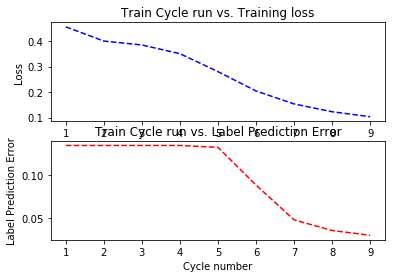

In [19]:
# Ensure we always get the same amount of randomness
np.random.seed(0)
# Define the data dimensions
input_dim = len(training_batch_x[0][0])#7877
num_output_classes = 2
num_hidden_layers = 2
hidden_layers_dim = 100

input = C.input_variable(input_dim)
label = C.input_variable(num_output_classes)

def linear_layer(input_var, output_dim):
    input_dim = input_var.shape[0]
    weight = C.parameter(shape=(input_dim, output_dim))
    bias = C.parameter(shape=(output_dim))
    return bias + C.times(input_var, weight)

def dense_layer(input_var, output_dim, nonlinearity):
    l = linear_layer(input_var, output_dim)
    return nonlinearity(l)

# Define a multilayer feedforward classification model
def fully_connected_classifier_net(input_var, num_output_classes, hidden_layer_dim, 
                                   num_hidden_layers, nonlinearity):
    h = dense_layer(input_var, hidden_layer_dim, nonlinearity)
    for i in range(1, num_hidden_layers):
        h = dense_layer(h, hidden_layer_dim, nonlinearity)
    
    return linear_layer(h, num_output_classes)


# Create the fully connected classfier
z = fully_connected_classifier_net(input, num_output_classes, hidden_layers_dim, 
                                   num_hidden_layers, C.sigmoid)



loss = C.cross_entropy_with_softmax(z, label)
eval_error = C.classification_error(z, label)


# Instantiate the trainer object to drive the model training
learning_rate = 0.5
lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch) 
learner = C.sgd(z.parameters, lr_schedule)
trainer = C.Trainer(z, (loss, eval_error), [learner])

# Initialize the parameters for the trainer
minibatch_size = each_batch_size#50
num_samples = train_count#5000
num_minibatches_to_train = num_samples / minibatch_size

print("train our model now")
data1 = {"batchsize":[], "loss":[], "error":[]}
for train_times in range(1,10):
    data2 = {"batchsize_t":[], "loss_t":[], "error_t":[]}
    for i in range(0, int(num_minibatches_to_train)):
        features=np.float32(training_batch_x[i])
        labels=np.float32(training_batch_y[i])
        # Specify the input variables mapping in the model to actual minibatch data for training
        trainer.train_minibatch({input : features, label : labels})####actual training
        loss = trainer.previous_minibatch_loss_average##################This only look at the last data
        error = trainer.previous_minibatch_evaluation_average###########This only look at the last data
        data2["loss_t"].append(loss)
        data2["error_t"].append(error)
        ###
    loss_all=sum(data2["loss_t"]) / float(len(data2["loss_t"]))
    error_all=sum(data2["error_t"]) / float(len(data2["error_t"]))
    data1["batchsize"].append(train_times)
    data1["loss"].append(loss_all)
    data1["error"].append(error_all)



plt.figure(1)
plt.subplot(211)
plt.plot(data1["batchsize"], data1["loss"], 'b--')
plt.xlabel('Cycle')
plt.ylabel('Loss')
plt.title('Train Cycle run vs. Training loss')
plt.subplot(212)
plt.plot(data1["batchsize"], data1["error"], 'r--')
plt.xlabel('Cycle number')
plt.ylabel('Label Prediction Error')
plt.title('Train Cycle run vs. Label Prediction Error')
plt.show()

In [21]:
features=np.float32(testing_x)
labels=np.float32(testing_y)
out = C.softmax(z)
predicted_label_probs = out.eval({input : features})
print("Label    :", [np.argmax(label) for label in labels])
print("Predicted:", [np.argmax(row) for row in predicted_label_probs])
a=[np.argmax(label) for label in labels]
b=[np.argmax(row) for row in predicted_label_probs]
for iii in range(0,len(a)):
    if iii==0:
        temp=((a[iii]==b[iii]).astype(np.float32))
    else:
        temp=temp+((a[iii]==b[iii]).astype(np.float32))

print("The accuracy of our model: ")
print(np.divide(temp, len(labels))*100)


Label    : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [22]:
import csv
import pandas
import sklearn
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

ImportError: No module named 'textblob'

Define que a execução deve ser inline...

In [ ]:
%matplotlib inline

In [3]:
messages = [line.rstrip() for line in open('./data/sms spam/SMSSpamCollection')]
print(len(messages))

5574


In [4]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [6]:
messages = pandas.read_csv('./data/sms spam/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
print(messages[:10])

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [7]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4827
      unique                                               4518
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [9]:
messages['length'] = messages['message'].map(lambda text: len(text))
print(messages.head())

  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


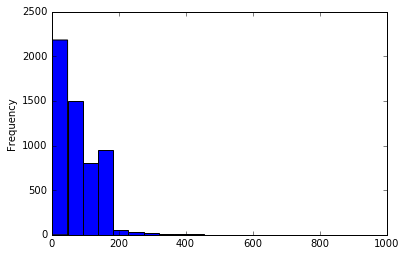

In [10]:
messages.length.plot(bins=20, kind='hist')

In [11]:
messages.length.describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
print(list(messages.message[messages.length > 900]))

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C7D36BF60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000027C7D3B4198>], dtype=object)

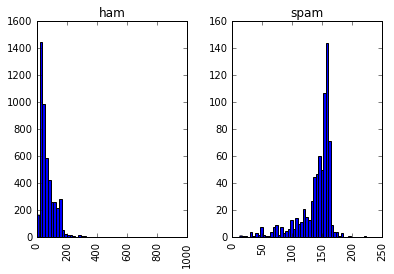

In [13]:
messages.hist(column='length', by='label', bins=50)